In [5]:
import scipy
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_excel("知識_教育_top500_revised.xlsx", engine='openpyxl')
# df2 = pd.read_excel("影視_top500_revised.xlsx", engine='openpyxl')
# df = pd.concat([df1, df2])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   rank            1500 non-null   int64         
 1   channel_title   1500 non-null   object        
 2   video_title     1500 non-null   object        
 3   published_time  1500 non-null   datetime64[ns]
 4   category        1500 non-null   int64         
 5   tags            1343 non-null   object        
 6   description     1487 non-null   object        
 7   view            1500 non-null   float64       
 8   likes           1500 non-null   int64         
 9   comments        1500 non-null   int64         
 10  duration        1500 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 129.0+ KB


In [8]:
df['duration_sec'] = df['duration'].map(lambda x: x.hour*3600 + x.minute*60 + x.second)
df['tags_num'] = df['tags'].map(lambda x: len(str(x).split(',')))
df['title_len'] = df['channel_title'].map(lambda x: len(x))

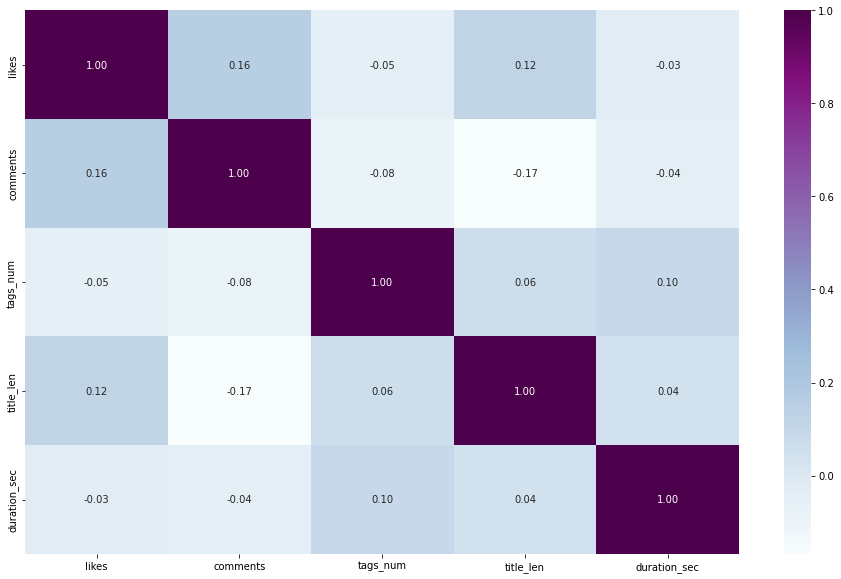

In [9]:
features = ['likes', 'comments', 'tags_num', 'title_len', 'duration_sec']
corr_= df[features].corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu");

In [10]:
# feature normalize
numerical_features = ['likes', 'comments', 'tags_num', 'title_len', 'duration_sec', 'view']

for var in numerical_features:
    df[var] = MinMaxScaler().fit_transform(df[var].values.reshape(len(df), 1))

In [7]:
one_hot_index = [5]
onehotencorder = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'), one_hot_index)],
    remainder='passthrough'                     
)

X = df[['likes', 'comments', 'tags_num', 'title_len', 'duration_sec', 'category']].values
y = df['view'].values

X = onehotencorder.fit_transform(X)

In [8]:
features

['likes', 'comments', 'tags_num', 'title_len', 'duration_sec']

In [9]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (1500, 9)
Shape of y: (1500,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
score = regressor.score(X_test, y_test)

w_0 = regressor.intercept_
w_1 = regressor.coef_

print('Interception : ', w_0)
print('Coeficient : ', w_1)
print('Score: ', score)

Interception :  149778096737.51468
Coeficient :  [-1.49778097e+11 -1.49778097e+11 -1.49778097e+11 -1.49778097e+11
  8.83933544e-01 -4.57630157e-02 -2.61306763e-04  1.39617920e-03
 -1.19972229e-02]
Score:  0.9061099920413855


In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

In [13]:
print(mae)
print(rmse)
print(r2)

0.0033894179474254324
0.010361336644379871
0.9061099920413855
